**YOUTH INCOME PREDICTION CHALLENGE**
>Can you predict if a young person in South Africa is employed?





The objective of our problem statement is to build a machine learning model that predicts youth employment, based on data from labour market surveys in South Africa.

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reads the train dataset
df=pd.read_csv("Train.csv")

EDA(Exploratory Data Analysis)


> 1.Understanding the Data

> 2.Handling Missing Values

> 3.Feature Engineering

> 4.Correlation Analysis

> 5.Data Splitting










**UNDERSTANDING THE DATA**

In [ ]:
#prints the top 5 rows of df
df.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Person_id        4020 non-null   object 
 1   Survey_date      4020 non-null   object 
 2   Round            4020 non-null   int64  
 3   Status           4020 non-null   object 
 4   Tenure           2626 non-null   float64
 5   Geography        4020 non-null   object 
 6   Province         4020 non-null   object 
 7   Matric           3012 non-null   float64
 8   Degree           2189 non-null   float64
 9   Diploma          2211 non-null   float64
 10  Schoolquintile   2359 non-null   float64
 11  Math             997 non-null    object 
 12  Mathlit          1353 non-null   object 
 13  Additional_lang  2018 non-null   object 
 14  Home_lang        381 non-null    object 
 15  Science          732 non-null    object 
 16  Female           4020 non-null   int64  
 17  Sa_citizen    

In [ ]:
#statistical information about features
df.describe()

,Round,Tenure,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,Birthyear,Birthmonth,Target
count,4020.000000,2626.000000,3012.000000,2189.000000,2211.000000,2359.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000
mean,3.129851,582.883092,0.850598,0.078118,0.081411,2.696482,0.564428,0.999502,1997.462935,5.344030,0.271891
std,0.978014,621.220657,0.356544,0.268418,0.273527,1.318409,0.495893,0.022302,4.378334,3.805916,0.444989
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1972.000000,1.000000,0.000000
25%,2.000000,95.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1995.000000,1.000000,0.000000
50%,3.000000,395.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1999.000000,5.000000,0.000000
75%,4.000000,819.000000,1.000000,0.000000,0.000000,4.000000,1.000000,1.000000,2000.000000,9.000000,1.000000
max,4.000000,3560.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,2004.000000,12.000000,1.000000


In [ ]:
#gives dimensions of df
df.shape

(4020, 21)

In [ ]:
#prints the features present in train data
df.columns

Index(['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography',
       'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Math',
       'Mathlit', 'Additional_lang', 'Home_lang', 'Science', 'Female',
       'Sa_citizen', 'Birthyear', 'Birthmonth', 'Target'],
      dtype='object')

In [ ]:
df1=df.copy

**HANDLING MISSING VALUES**

In [ ]:
#calculating percentage of null values
total_columns = len(df.columns)
df['NullPercentage'] = df.isnull().sum(axis=1) / total_columns * 100

In [ ]:
threshold = 50  # Set the threshold percentage
df.drop(df[df['NullPercentage'] > threshold].index, inplace=True)

In [ ]:
#dropping columns where null value >50%
df.drop(columns=['NullPercentage'], inplace=True)

In [ ]:
df.shape

(4020, 21)

In [ ]:
#returns boolean(TRUE) values if any row coontains null
df.isnull().any(axis=1)

0       True
1       True
2       True
3       True
4       True
        ... 
4015    True
4016    True
4017    True
4018    True
4019    True
Length: 4020, dtype: bool

In [ ]:
#returns boolean(TRUE) values if all rows contains null
df.isnull().all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
4015    False
4016    False
4017    False
4018    False
4019    False
Length: 4020, dtype: bool

In [ ]:
100*(len(df[df.isnull().sum(axis=1) > 10].index) / len(df.index))

0.0

**CORRELATION ANALYSIS**

In [ ]:
#correlation between columns
corr = df.corr()

In [ ]:
corr

,Round,Tenure,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,Birthyear,Birthmonth,Target
Round,1.000000,0.077824,-0.005343,-0.114919,-0.067928,-0.039557,-0.055219,0.002963,0.099325,0.069281,-0.192630
Tenure,0.077824,1.000000,-0.109920,-0.067364,-0.014580,-0.030538,0.080271,0.016243,-0.208548,0.020756,0.022178
Matric,-0.005343,-0.109920,1.000000,0.111748,0.099904,0.007090,0.011053,-0.007638,0.174145,-0.080915,0.048094
Degree,-0.114919,-0.067364,0.111748,1.000000,-0.068337,0.033062,-0.005318,0.006223,-0.092559,0.017298,0.079067
Diploma,-0.067928,-0.014580,0.099904,-0.068337,1.000000,-0.022752,-0.024353,0.006333,-0.121658,0.010455,0.090482
Schoolquintile,-0.039557,-0.030538,0.007090,0.033062,-0.022752,1.000000,0.035570,-0.004742,0.045534,0.014171,0.071164
Female,-0.055219,0.080271,0.011053,-0.005318,-0.024353,0.035570,1.000000,-0.019599,0.050837,-0.089860,-0.103646
Sa_citizen,0.002963,0.016243,-0.007638,0.006223,0.006333,-0.004742,-0.019599,1.000000,-0.012930,0.004948,-0.011438
Birthyear,0.099325,-0.208548,0.174145,-0.092559,-0.121658,0.045534,0.050837,-0.012930,1.000000,-0.225191,-0.093354
Birthmonth,0.069281,0.020756,-0.080915,0.017298,0.010455,0.014171,-0.089860,0.004948,-0.225191,1.000000,-0.007056


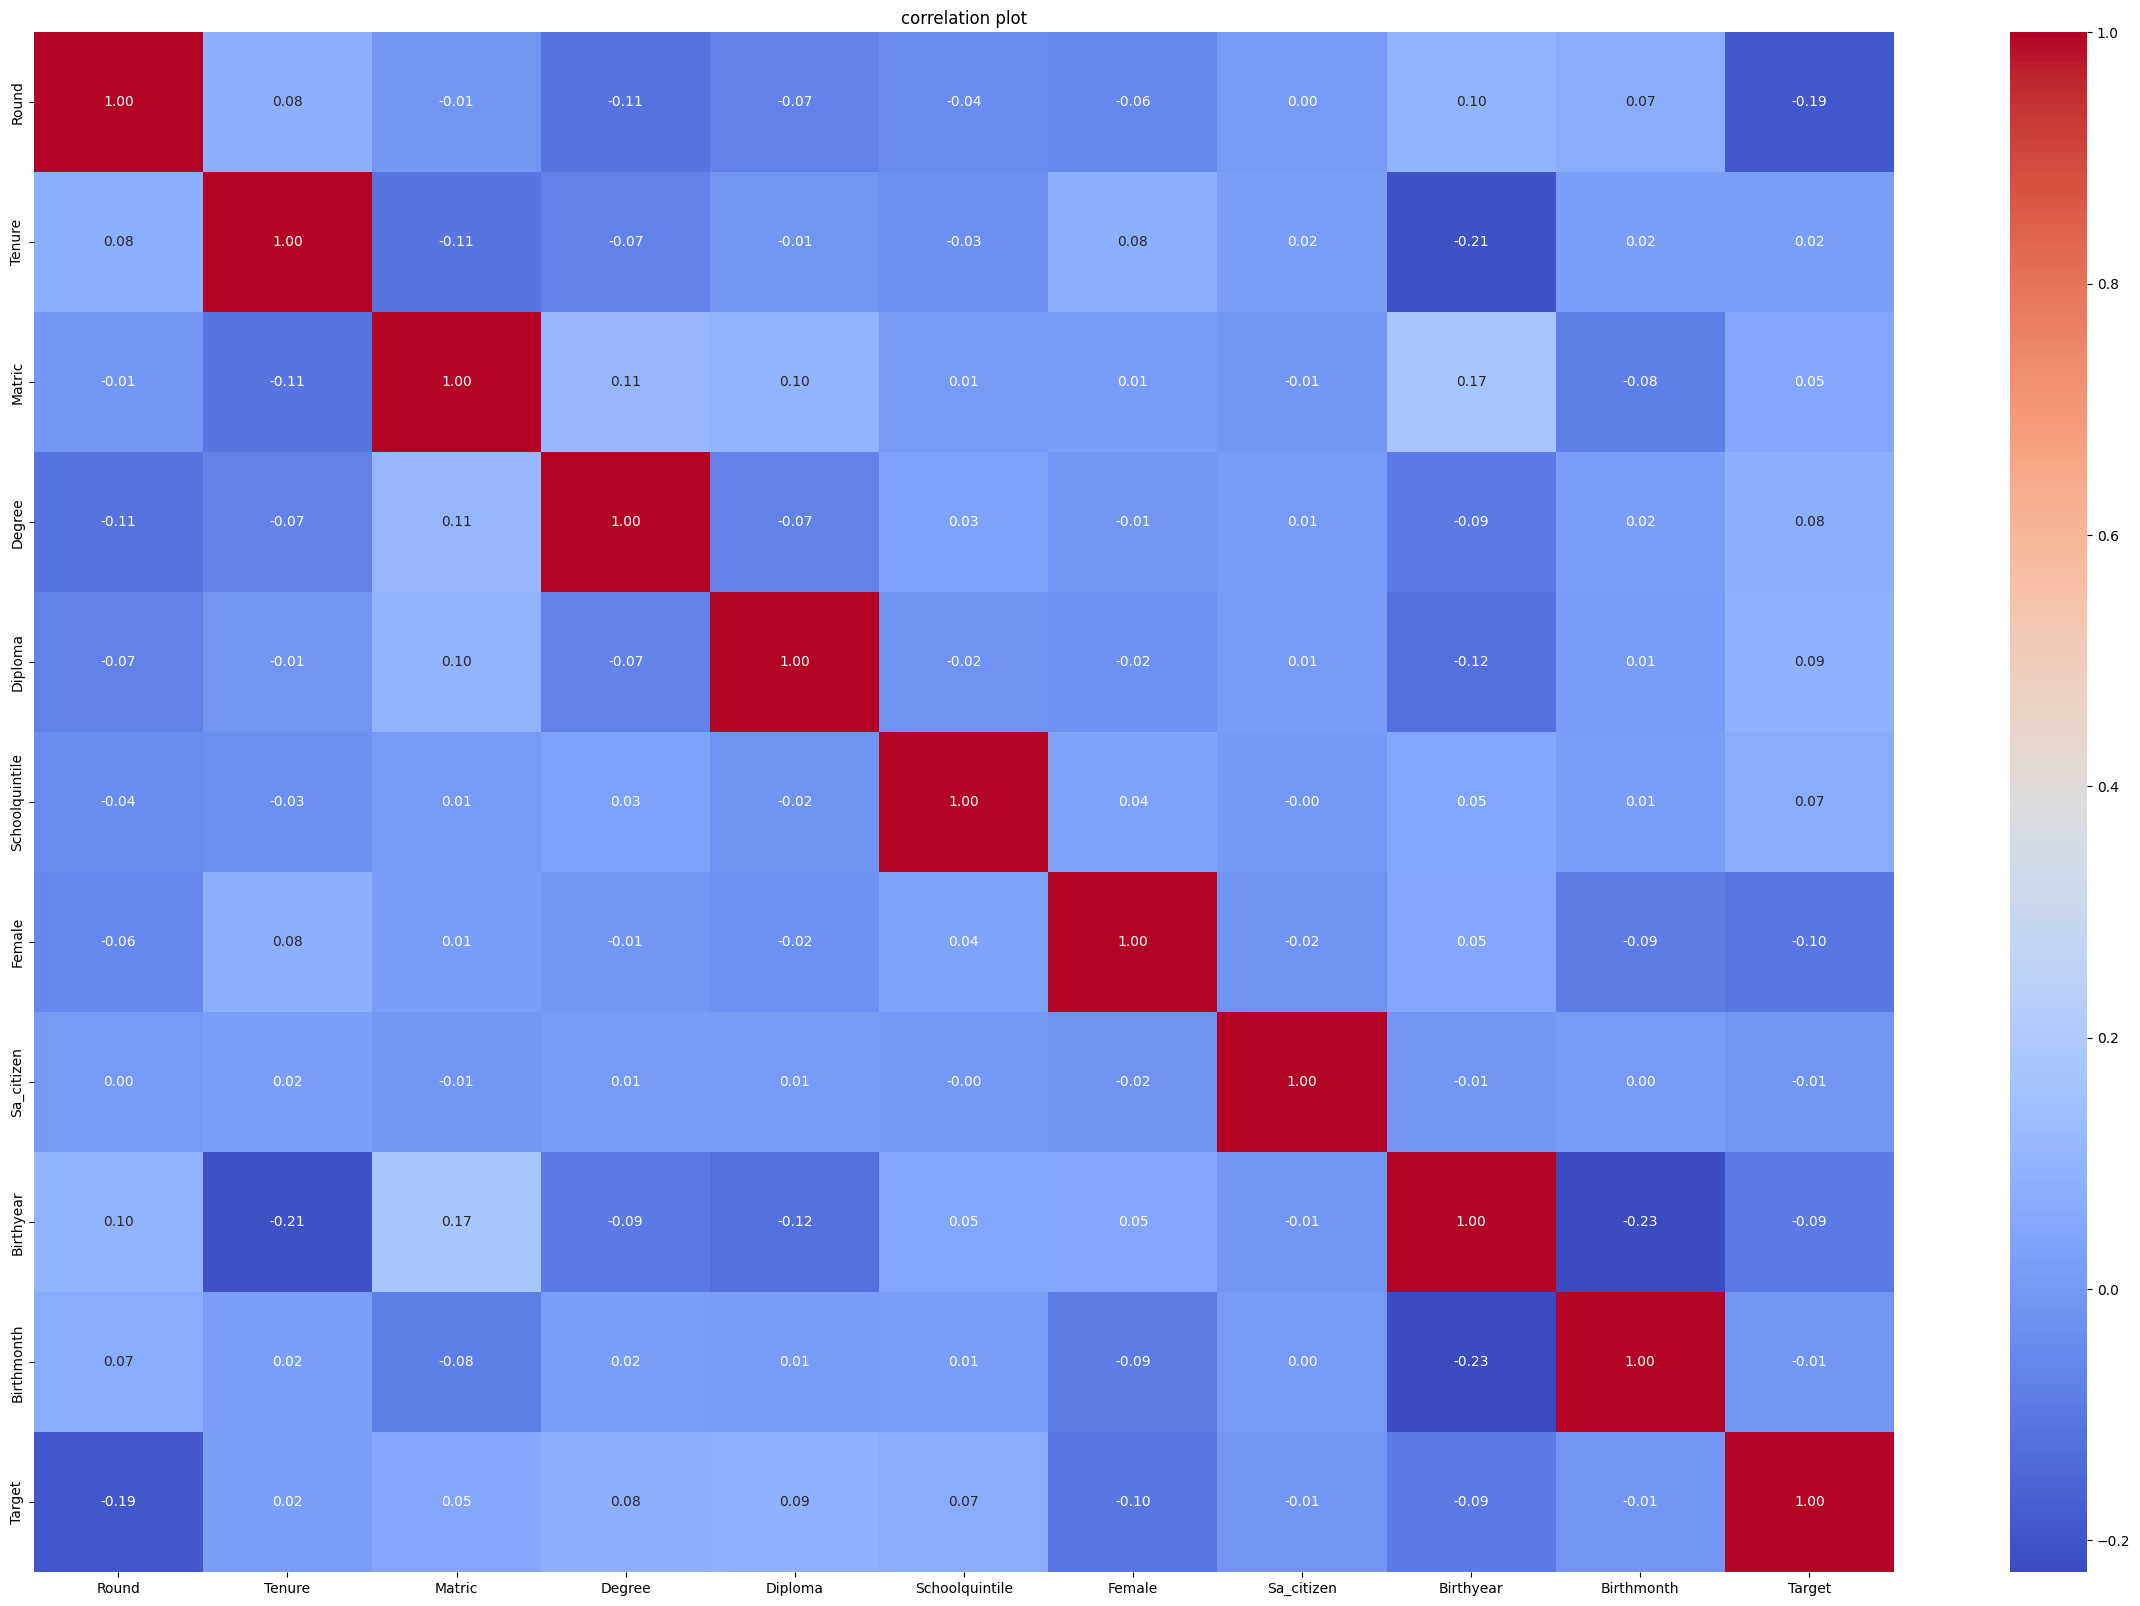

In [ ]:
#heatmap to vizualize correlation between features
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',fmt='.2f')
plt.title("correlation plot")
plt.show()

In [ ]:
df[['Start', 'End']] = df['Additional_lang'].str.split(' - ', expand=True)
df[['Start', 'End']] = df[['Start', 'End']].apply(lambda x: x.str.rstrip('%')).astype(float)

# Calculate the average value if needed
df['Average'] = (df['Start'] + df['End']) // 2

# Display the DataFrame with numeric values
print(df)


          Person_id Survey_date  Round         Status  Tenure Geography  \
0     Id_eqz61wz7yn  2022-02-23      2       studying     NaN     Rural   
1     Id_kj5k3g5wud  2023-02-06      4     unemployed   427.0    Suburb   
2     Id_9h0isj38y4  2022-08-08      3          other     NaN     Urban   
3     Id_5ch3zwpdef  2022-03-16      2     unemployed   810.0     Urban   
4     Id_g4elxibjej  2023-03-22      4       studying     NaN     Urban   
...             ...         ...    ...            ...     ...       ...   
4015  Id_3lxfvtmbkr  2023-02-13      4  wage employed   273.0     Rural   
4016  Id_u3uc3v9pts  2023-02-02      4     unemployed   401.0     Urban   
4017  Id_enkksj5q5r  2023-03-20      4     unemployed  2287.0     Urban   
4018  Id_3rtpd7kc1g  2022-03-15      2       studying     NaN     Urban   
4019  Id_d8hb0i7g0r  2023-02-28      4     unemployed   243.0     Urban   

           Province  Matric  Degree  Diploma  ...  Home_lang    Science  \
0        Mpumalanga     

**HANDLING MISSING VALUES AND FEATURE ENGINEERING**



> Impute numerical features with either mean or median.

>Categorical features with mode.

> Drop them if columns with greater % of null values.





In [ ]:
df.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target,Start,End,Average
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,NaN,0 - 29 %,1,1,2000,5,0,50.0,59.0,54.0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,NaN,30 - 39 %,1,1,1989,4,1,40.0,49.0,44.0
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,NaN,30 - 39 %,0,1,1996,7,1,40.0,49.0,44.0
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,0,1,2000,1,0,NaN,NaN,NaN
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,1,1,1998,12,0,NaN,NaN,NaN


In [ ]:
df=df.drop(['Start','End','Additional_lang'],axis=1)

In [ ]:
df.rename(columns = {'Average' : 'Additional_lang'},inplace=True)

In [ ]:
df.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target,Additional_lang
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,NaN,NaN,0 - 29 %,1,1,2000,5,0,54.0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,NaN,NaN,30 - 39 %,1,1,1989,4,1,44.0
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,NaN,NaN,30 - 39 %,0,1,1996,7,1,44.0
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,2000,1,0,NaN
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,1998,12,0,NaN


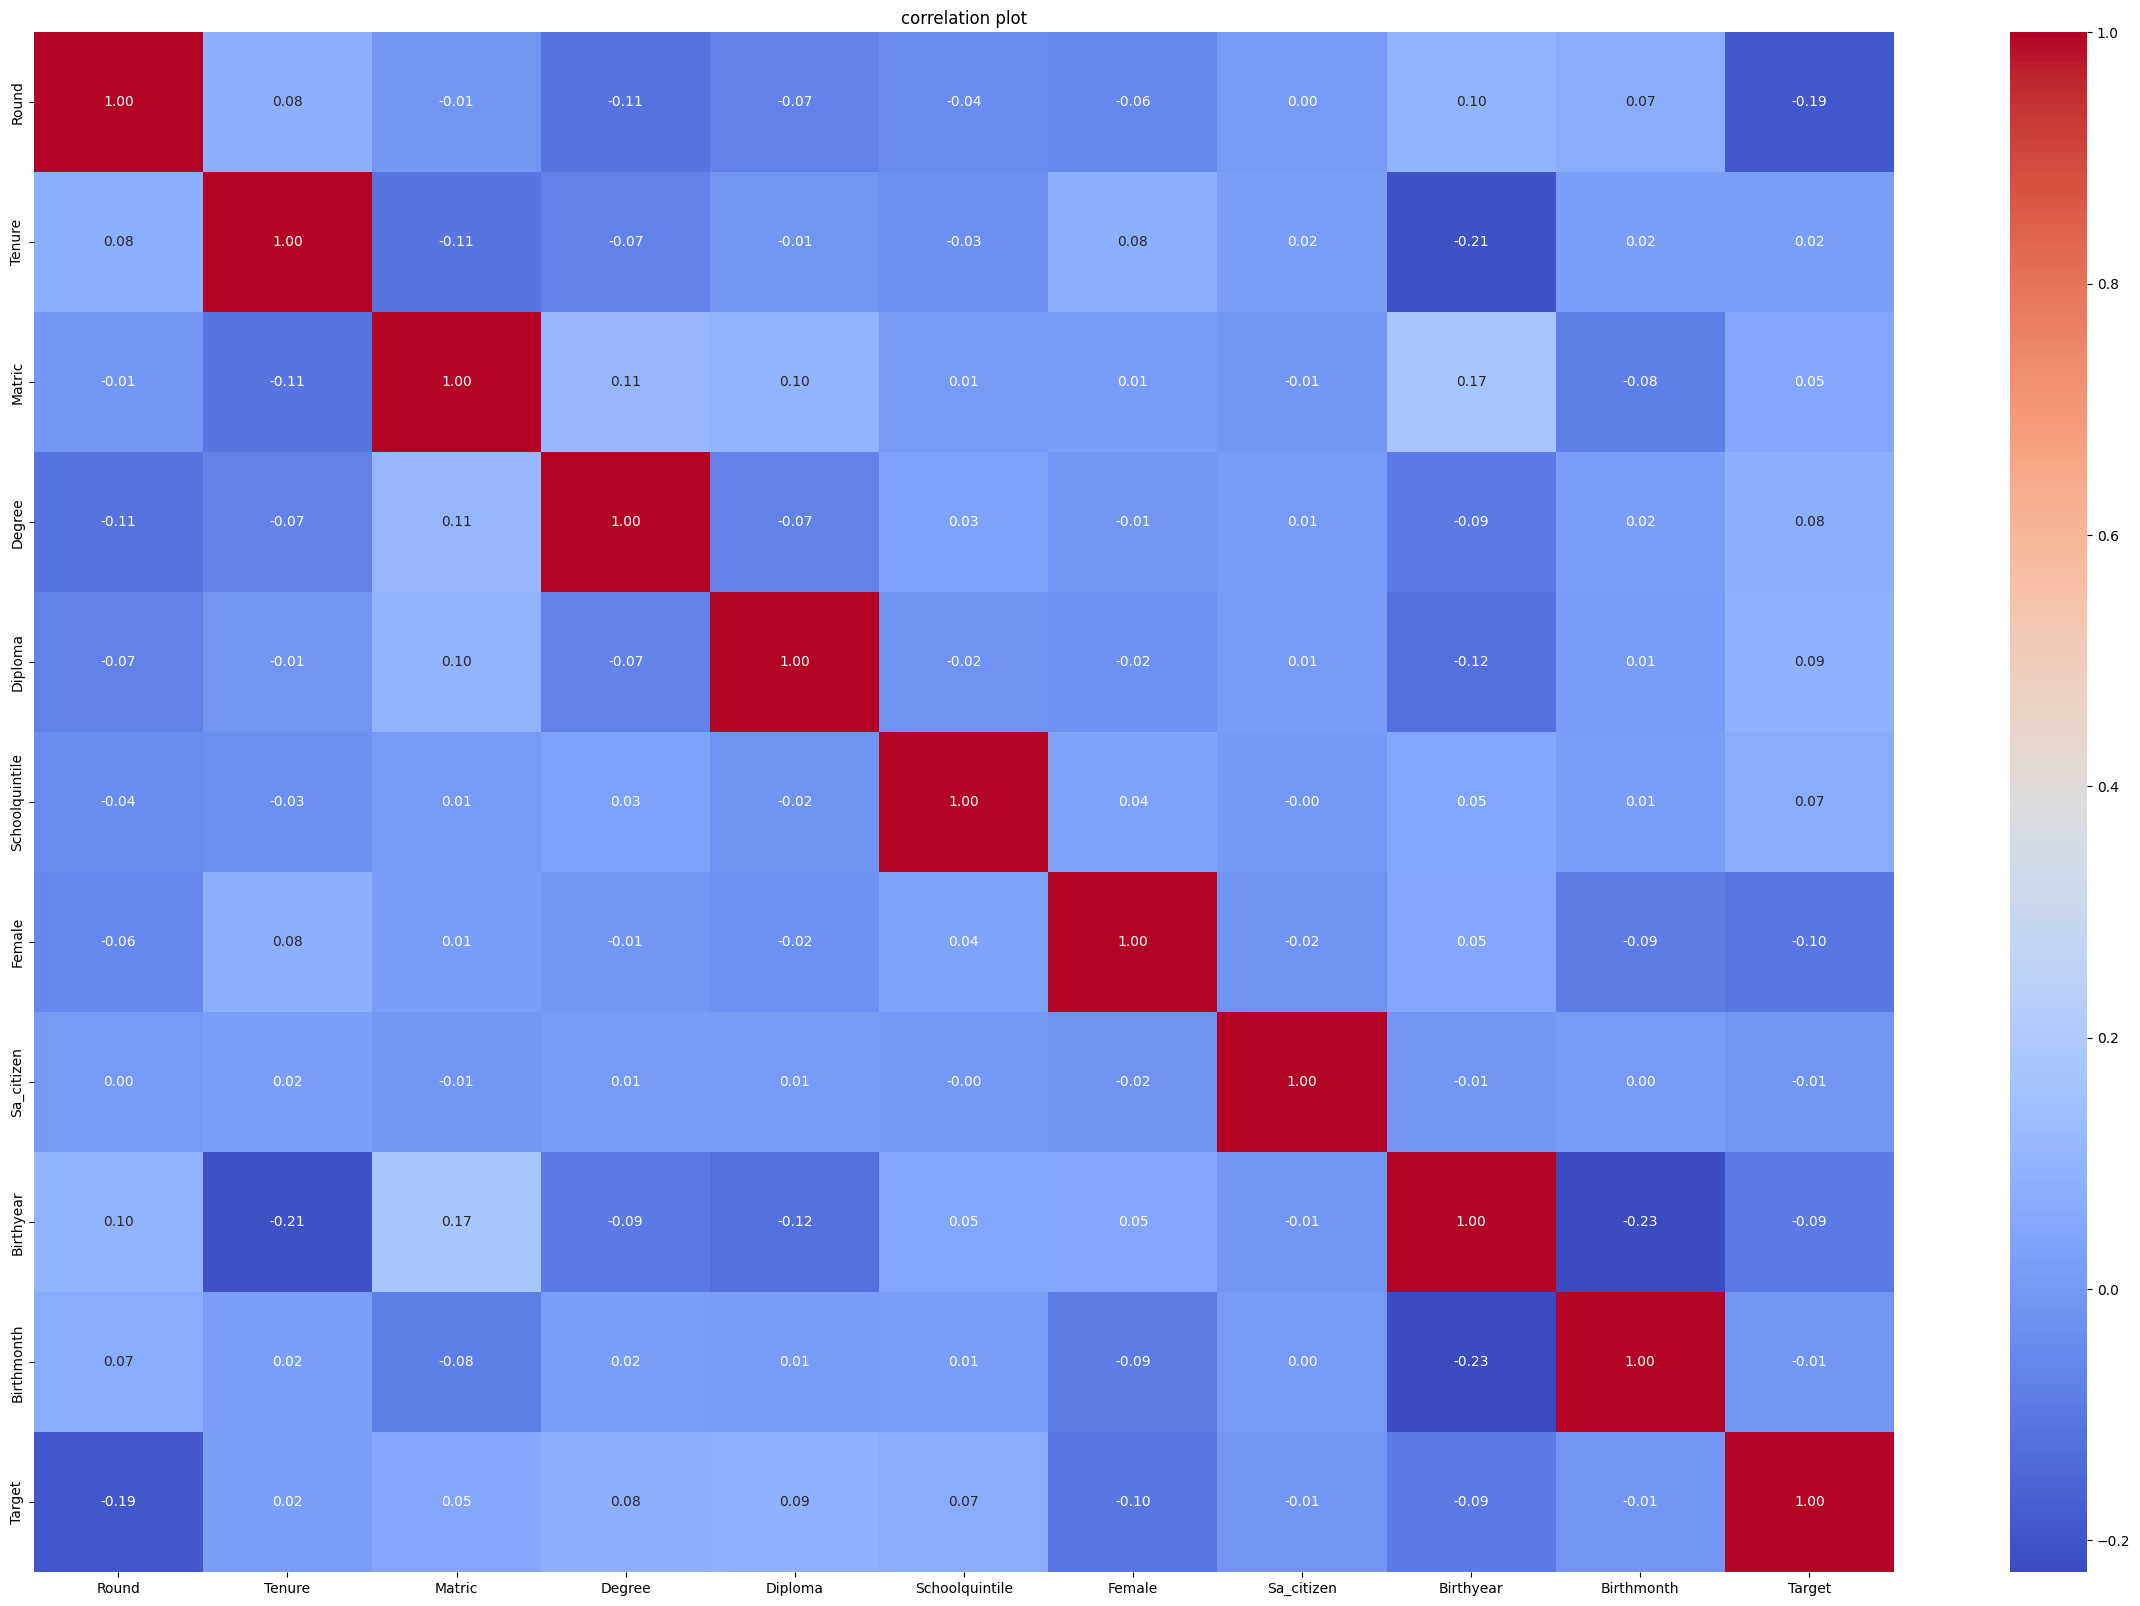

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',fmt='.2f')
plt.title("correlation plot")
plt.show()

In [ ]:
mean_value = df['Additional_lang'].mean()


In [ ]:
df['Additional_lang'].fillna(mean_value, inplace=True)


In [ ]:
df['Additional_lang'] = df['Additional_lang'].astype(int)


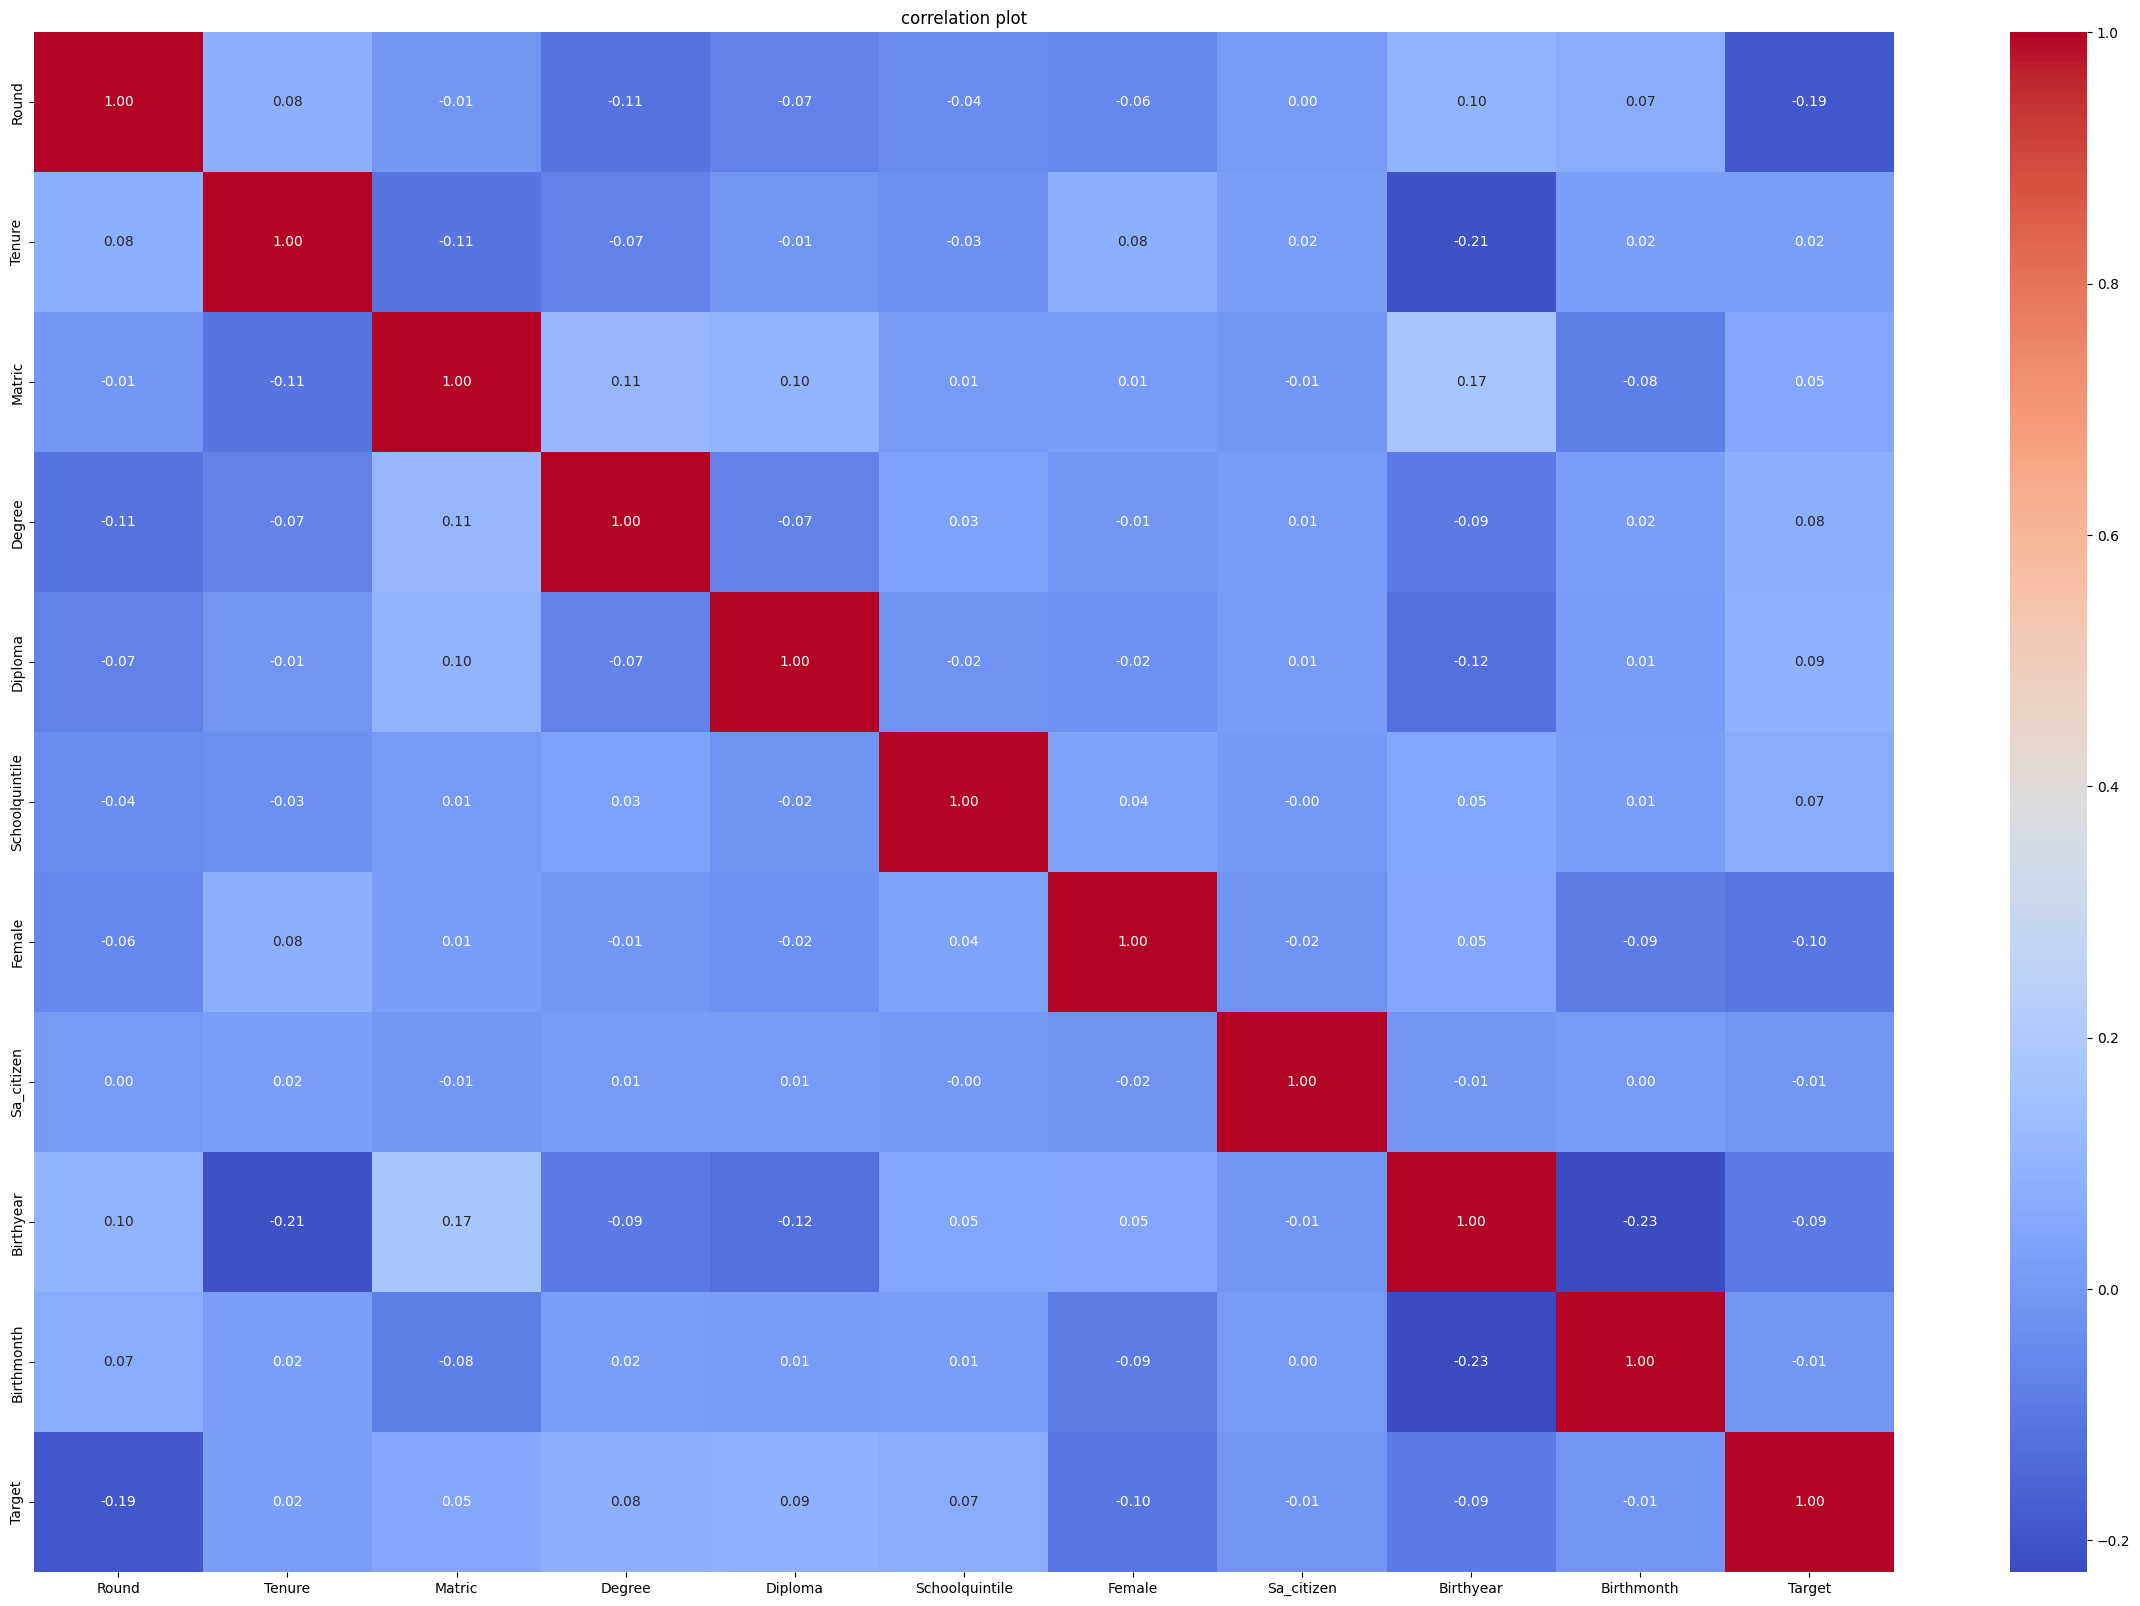

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',fmt='.2f')
plt.title("correlation plot")
plt.show()

In [ ]:
correlation_with_feature1 = df['Target'].corr(df['Additional_lang'])

In [ ]:
correlation_with_feature1

0.00788460379789079

In [ ]:
df[['Start', 'End']] = df['Home_lang'].str.split(' - ', expand=True)
df[['Start', 'End']] = df[['Start', 'End']].apply(lambda x: x.str.rstrip('%')).astype(float)

# Calculate the average value if needed
df['Average'] = (df['Start'] + df['End']) // 2

# Display the DataFrame with numeric values
print(df)


          Person_id Survey_date  Round         Status  Tenure Geography  \
0     Id_eqz61wz7yn  2022-02-23      2       studying     NaN     Rural   
1     Id_kj5k3g5wud  2023-02-06      4     unemployed   427.0    Suburb   
2     Id_9h0isj38y4  2022-08-08      3          other     NaN     Urban   
3     Id_5ch3zwpdef  2022-03-16      2     unemployed   810.0     Urban   
4     Id_g4elxibjej  2023-03-22      4       studying     NaN     Urban   
...             ...         ...    ...            ...     ...       ...   
4015  Id_3lxfvtmbkr  2023-02-13      4  wage employed   273.0     Rural   
4016  Id_u3uc3v9pts  2023-02-02      4     unemployed   401.0     Urban   
4017  Id_enkksj5q5r  2023-03-20      4     unemployed  2287.0     Urban   
4018  Id_3rtpd7kc1g  2022-03-15      2       studying     NaN     Urban   
4019  Id_d8hb0i7g0r  2023-02-28      4     unemployed   243.0     Urban   

           Province  Matric  Degree  Diploma  ...    Science Female  \
0        Mpumalanga     1.0 

In [ ]:
df=df.drop(['Start','End','Home_lang'],axis=1)

In [ ]:
df.rename(columns = {'Average' : 'Home_lang'},inplace=True)

In [ ]:
df['Home_lang'].fillna(df['Home_lang'].mean(), inplace=True)



In [ ]:
df['Home_lang'] = df['Home_lang'].astype(int)


In [ ]:
correlation_with_feature2 = df['Target'].corr(df['Home_lang'])

In [ ]:
correlation_with_feature2

-0.011360124549532356

In [ ]:
df[['Start', 'End']] = df['Science'].str.split(' - ', expand=True)
df[['Start', 'End']] = df[['Start', 'End']].apply(lambda x: x.str.rstrip('%')).astype(float)

# Calculate the average value if needed
df['Average'] = (df['Start'] + df['End']) // 2

# Display the DataFrame with numeric values
print(df)


          Person_id Survey_date  Round         Status  Tenure Geography  \
0     Id_eqz61wz7yn  2022-02-23      2       studying     NaN     Rural   
1     Id_kj5k3g5wud  2023-02-06      4     unemployed   427.0    Suburb   
2     Id_9h0isj38y4  2022-08-08      3          other     NaN     Urban   
3     Id_5ch3zwpdef  2022-03-16      2     unemployed   810.0     Urban   
4     Id_g4elxibjej  2023-03-22      4       studying     NaN     Urban   
...             ...         ...    ...            ...     ...       ...   
4015  Id_3lxfvtmbkr  2023-02-13      4  wage employed   273.0     Rural   
4016  Id_u3uc3v9pts  2023-02-02      4     unemployed   401.0     Urban   
4017  Id_enkksj5q5r  2023-03-20      4     unemployed  2287.0     Urban   
4018  Id_3rtpd7kc1g  2022-03-15      2       studying     NaN     Urban   
4019  Id_d8hb0i7g0r  2023-02-28      4     unemployed   243.0     Urban   

           Province  Matric  Degree  Diploma  ...  Female Sa_citizen  \
0        Mpumalanga     1.0

In [ ]:
df=df.drop(['Start','End','Science'],axis=1)

In [ ]:
df.rename(columns = {'Average' : 'Science'},inplace=True)

In [ ]:
df['Science'].fillna(df['Science'].mean(), inplace=True)


In [ ]:
df['Science'] = df['Science'].astype(int)


In [ ]:
correlation_with_feature3 = df['Target'].corr(df['Science'])

In [ ]:
correlation_with_feature3

-0.008206738482912231

In [ ]:
df = df.drop(['Birthyear','Birthmonth'],axis=1)

In [ ]:
df.columns

Index(['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography',
       'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Math',
       'Mathlit', 'Female', 'Sa_citizen', 'Target', 'Additional_lang',
       'Home_lang', 'Science'],
      dtype='object')

In [ ]:
df[['Start', 'End']] = df['Mathlit'].str.split(' - ', expand=True)
df[['Start', 'End']] = df[['Start', 'End']].apply(lambda x: x.str.rstrip('%')).astype(float)

# Calculate the average value if needed
df['Average'] = (df['Start'] + df['End']) // 2

# Display the DataFrame with numeric values
print(df)


          Person_id Survey_date  Round         Status  Tenure Geography  \
0     Id_eqz61wz7yn  2022-02-23      2       studying     NaN     Rural   
1     Id_kj5k3g5wud  2023-02-06      4     unemployed   427.0    Suburb   
2     Id_9h0isj38y4  2022-08-08      3          other     NaN     Urban   
3     Id_5ch3zwpdef  2022-03-16      2     unemployed   810.0     Urban   
4     Id_g4elxibjej  2023-03-22      4       studying     NaN     Urban   
...             ...         ...    ...            ...     ...       ...   
4015  Id_3lxfvtmbkr  2023-02-13      4  wage employed   273.0     Rural   
4016  Id_u3uc3v9pts  2023-02-02      4     unemployed   401.0     Urban   
4017  Id_enkksj5q5r  2023-03-20      4     unemployed  2287.0     Urban   
4018  Id_3rtpd7kc1g  2022-03-15      2       studying     NaN     Urban   
4019  Id_d8hb0i7g0r  2023-02-28      4     unemployed   243.0     Urban   

           Province  Matric  Degree  Diploma  ...    Mathlit Female  \
0        Mpumalanga     1.0 

In [ ]:
df=df.drop(['Start','End','Mathlit'],axis=1)

In [ ]:
df.rename(columns = {'Average' : 'Mathlit'},inplace=True)

In [ ]:
df['Mathlit'].fillna(df['Mathlit'].mean(), inplace=True)


In [ ]:
df['Mathlit'] = df['Mathlit'].astype(int)


In [ ]:
df['Mathlit'] = df['Mathlit'].astype(int)


In [ ]:
correlation_with_feature4 = df['Target'].corr(df['Mathlit'])

In [ ]:
df[['Start', 'End']] = df['Math'].str.split(' - ', expand=True)
df[['Start', 'End']] = df[['Start', 'End']].apply(lambda x: x.str.rstrip('%')).astype(float)

# Calculate the average value if needed
df['Average'] = (df['Start'] + df['End']) // 2

# Display the DataFrame with numeric values
print(df)


          Person_id Survey_date  Round         Status  Tenure Geography  \
0     Id_eqz61wz7yn  2022-02-23      2       studying     NaN     Rural   
1     Id_kj5k3g5wud  2023-02-06      4     unemployed   427.0    Suburb   
2     Id_9h0isj38y4  2022-08-08      3          other     NaN     Urban   
3     Id_5ch3zwpdef  2022-03-16      2     unemployed   810.0     Urban   
4     Id_g4elxibjej  2023-03-22      4       studying     NaN     Urban   
...             ...         ...    ...            ...     ...       ...   
4015  Id_3lxfvtmbkr  2023-02-13      4  wage employed   273.0     Rural   
4016  Id_u3uc3v9pts  2023-02-02      4     unemployed   401.0     Urban   
4017  Id_enkksj5q5r  2023-03-20      4     unemployed  2287.0     Urban   
4018  Id_3rtpd7kc1g  2022-03-15      2       studying     NaN     Urban   
4019  Id_d8hb0i7g0r  2023-02-28      4     unemployed   243.0     Urban   

           Province  Matric  Degree  Diploma  ...  Female Sa_citizen  Target  \
0        Mpumalanga

In [ ]:
df=df.drop(['Start','End','Math'],axis=1)

In [ ]:
df.rename(columns = {'Average' : 'Math'},inplace=True)

In [ ]:
df['Math'].fillna(df['Math'].mean(), inplace=True)


In [ ]:
df['Math'] = df['Math'].astype(int)


In [ ]:
correlation_with_feature5 = df['Target'].corr(df['Math'])

In [ ]:
correlation_with_feature5

0.03457001174819869

In [ ]:
df.isnull().sum()


Person_id             0
Survey_date           0
Round                 0
Status                0
Tenure             1394
Geography             0
Province              0
Matric             1008
Degree             1831
Diploma            1809
Schoolquintile     1661
Female                0
Sa_citizen            0
Target                0
Additional_lang       0
Home_lang             0
Science               0
Mathlit               0
Math                  0
dtype: int64

In [ ]:
numeric_features = ['Tenure','Matric','Degree','Diploma','Schoolquintile']
for feature in numeric_features:
  df[feature].fillna(df[feature].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Person_id          0
Survey_date        0
Round              0
Status             0
Tenure             0
Geography          0
Province           0
Matric             0
Degree             0
Diploma            0
Schoolquintile     0
Female             0
Sa_citizen         0
Target             0
Additional_lang    0
Home_lang          0
Science            0
Mathlit            0
Math               0
dtype: int64

In [ ]:
df['Survey_date'] = pd.to_datetime(df['Survey_date'])

df['year'] = df['Survey_date'].dt.year
df['month'] = df['Survey_date'].dt.month
df['day'] = df['Survey_date'].dt.day
print(df.head())

       Person_id Survey_date  Round      Status      Tenure Geography  \
0  Id_eqz61wz7yn  2022-02-23      2    studying  582.883092     Rural   
1  Id_kj5k3g5wud  2023-02-06      4  unemployed  427.000000    Suburb   
2  Id_9h0isj38y4  2022-08-08      3       other  582.883092     Urban   
3  Id_5ch3zwpdef  2022-03-16      2  unemployed  810.000000     Urban   
4  Id_g4elxibjej  2023-03-22      4    studying  582.883092     Urban   

       Province    Matric    Degree   Diploma  ...  Sa_citizen  Target  \
0    Mpumalanga  1.000000  0.000000  0.000000  ...           1       0   
1    North West  1.000000  0.000000  0.000000  ...           1       1   
2    Free State  1.000000  0.000000  0.000000  ...           1       1   
3  Eastern Cape  0.850598  0.078118  0.081411  ...           1       0   
4       Limpopo  0.850598  0.078118  0.081411  ...           1       0   

   Additional_lang  Home_lang  Science  Mathlit  Math  year  month  day  
0               54         53       14    

In [ ]:
df=df.drop(['Survey_date'],axis=1)

Follow the same procedure that we implemented for train dataset.

In [ ]:
test_data=pd.read_csv("Test.csv")

In [ ]:
test_data.shape

(1934, 20)

In [ ]:
test_data.isnull().sum()

Person_id             0
Survey_date           0
Round                 0
Status                0
Tenure              732
Geography             0
Province              0
Matric              524
Degree              888
Diploma             881
Schoolquintile      818
Math               1439
Mathlit            1319
Additional_lang     983
Home_lang          1750
Science            1580
Female                0
Sa_citizen            0
Birthyear             0
Birthmonth            0
dtype: int64

In [ ]:
numeric_features = ['Tenure','Matric','Degree','Diploma','Schoolquintile']
for feature in numeric_features:
  test_data[feature].fillna(test_data[feature].mean(), inplace=True)

In [ ]:
test_data[['Start', 'End']] = test_data['Additional_lang'].str.split(' - ', expand=True)
test_data[['Start', 'End']] = test_data[['Start', 'End']].apply(lambda x: x.str.rstrip('%')).astype(float)

# Calculate the average value if needed
test_data['Average'] = (test_data['Start'] + test_data['End']) // 2

# Display the DataFrame with numeric values
print(test_data)


          Person_id Survey_date  Round         Status      Tenure Geography  \
0     Id_r90136smvl  2022-08-03      3          other  587.060732     Urban   
1     Id_wawdqhmu6s  2023-03-16      4     unemployed  979.000000     Urban   
2     Id_ap2czff2bu  2023-03-14      4     unemployed  339.000000     Urban   
3     Id_uhgink7iha  2023-02-16      4       studying  587.060732     Urban   
4     Id_5j6bzk3k81  2023-03-23      4     unemployed  613.000000     Urban   
...             ...         ...    ...            ...         ...       ...   
1929  Id_iogk84m72d  2022-08-05      3     unemployed  948.000000     Urban   
1930  Id_exoifxvj0s  2023-03-06      4       studying  587.060732     Urban   
1931  Id_ixio0xbvta  2023-02-02      4     unemployed  767.000000     Rural   
1932  Id_3vjt2lnwp3  2023-03-02      4       studying  587.060732     Urban   
1933  Id_q8na9byk0c  2023-02-02      4  wage employed    5.000000     Urban   

           Province    Matric    Degree   Diploma  

In [ ]:
test_data=test_data.drop(['Start','End','Additional_lang'],axis=1)

In [ ]:
test_data.rename(columns = {'Average' : 'Additional_lang'},inplace=True)

In [ ]:
test_data['Additional_lang'].fillna(test_data['Additional_lang'].mean(), inplace=True)

In [ ]:
test_data['Additional_lang'] = test_data['Additional_lang'].astype(int)


In [ ]:
test_data[['Start', 'End']] = test_data['Home_lang'].str.split(' - ', expand=True)
test_data[['Start', 'End']] = test_data[['Start', 'End']].apply(lambda x: x.str.rstrip('%')).astype(float)

# Calculate the average value if needed
test_data['Average'] = (test_data['Start'] + test_data['End']) // 2

# Display the DataFrame with numeric values
print(test_data)

          Person_id Survey_date  Round         Status      Tenure Geography  \
0     Id_r90136smvl  2022-08-03      3          other  587.060732     Urban   
1     Id_wawdqhmu6s  2023-03-16      4     unemployed  979.000000     Urban   
2     Id_ap2czff2bu  2023-03-14      4     unemployed  339.000000     Urban   
3     Id_uhgink7iha  2023-02-16      4       studying  587.060732     Urban   
4     Id_5j6bzk3k81  2023-03-23      4     unemployed  613.000000     Urban   
...             ...         ...    ...            ...         ...       ...   
1929  Id_iogk84m72d  2022-08-05      3     unemployed  948.000000     Urban   
1930  Id_exoifxvj0s  2023-03-06      4       studying  587.060732     Urban   
1931  Id_ixio0xbvta  2023-02-02      4     unemployed  767.000000     Rural   
1932  Id_3vjt2lnwp3  2023-03-02      4       studying  587.060732     Urban   
1933  Id_q8na9byk0c  2023-02-02      4  wage employed    5.000000     Urban   

           Province    Matric    Degree   Diploma  

In [ ]:
test_data=test_data.drop(['Start','End','Home_lang'],axis=1)

In [ ]:
test_data.rename(columns = {'Average' : 'Home_lang'},inplace=True)

In [ ]:
test_data['Home_lang'].fillna(test_data['Home_lang'].mean(), inplace=True)

In [ ]:
test_data['Home_lang'] = test_data['Home_lang'].astype(int)

In [ ]:
test_data[['Start', 'End']] = test_data['Science'].str.split(' - ', expand=True)
test_data[['Start', 'End']] = test_data[['Start', 'End']].apply(lambda x: x.str.rstrip('%')).astype(float)

# Calculate the average value if needed
test_data['Average'] = (test_data['Start'] + test_data['End']) // 2

# Display the DataFrame with numeric values
print(test_data)

          Person_id Survey_date  Round         Status      Tenure Geography  \
0     Id_r90136smvl  2022-08-03      3          other  587.060732     Urban   
1     Id_wawdqhmu6s  2023-03-16      4     unemployed  979.000000     Urban   
2     Id_ap2czff2bu  2023-03-14      4     unemployed  339.000000     Urban   
3     Id_uhgink7iha  2023-02-16      4       studying  587.060732     Urban   
4     Id_5j6bzk3k81  2023-03-23      4     unemployed  613.000000     Urban   
...             ...         ...    ...            ...         ...       ...   
1929  Id_iogk84m72d  2022-08-05      3     unemployed  948.000000     Urban   
1930  Id_exoifxvj0s  2023-03-06      4       studying  587.060732     Urban   
1931  Id_ixio0xbvta  2023-02-02      4     unemployed  767.000000     Rural   
1932  Id_3vjt2lnwp3  2023-03-02      4       studying  587.060732     Urban   
1933  Id_q8na9byk0c  2023-02-02      4  wage employed    5.000000     Urban   

           Province    Matric    Degree   Diploma  

In [ ]:
test_data=test_data.drop(['Start','End','Science'],axis=1)

In [ ]:
test_data.rename(columns = {'Average' : 'Science'},inplace=True)

In [ ]:
test_data['Science'].fillna(test_data['Science'].mean(), inplace=True)

In [ ]:
test_data['Science'] = test_data['Science'].astype(int)

In [ ]:
test_data[['Start', 'End']] = test_data['Mathlit'].str.split(' - ', expand=True)
test_data[['Start', 'End']] = test_data[['Start', 'End']].apply(lambda x: x.str.rstrip('%')).astype(float)

# Calculate the average value if needed
test_data['Average'] = (test_data['Start'] + test_data['End']) // 2

# Display the DataFrame with numeric values
print(test_data)

          Person_id Survey_date  Round         Status      Tenure Geography  \
0     Id_r90136smvl  2022-08-03      3          other  587.060732     Urban   
1     Id_wawdqhmu6s  2023-03-16      4     unemployed  979.000000     Urban   
2     Id_ap2czff2bu  2023-03-14      4     unemployed  339.000000     Urban   
3     Id_uhgink7iha  2023-02-16      4       studying  587.060732     Urban   
4     Id_5j6bzk3k81  2023-03-23      4     unemployed  613.000000     Urban   
...             ...         ...    ...            ...         ...       ...   
1929  Id_iogk84m72d  2022-08-05      3     unemployed  948.000000     Urban   
1930  Id_exoifxvj0s  2023-03-06      4       studying  587.060732     Urban   
1931  Id_ixio0xbvta  2023-02-02      4     unemployed  767.000000     Rural   
1932  Id_3vjt2lnwp3  2023-03-02      4       studying  587.060732     Urban   
1933  Id_q8na9byk0c  2023-02-02      4  wage employed    5.000000     Urban   

           Province    Matric    Degree   Diploma  

In [ ]:
test_data=test_data.drop(['Start','End','Mathlit'],axis=1)

In [ ]:
test_data.rename(columns = {'Average' : 'Mathlit'},inplace=True)

In [ ]:
test_data['Mathlit'].fillna(test_data['Mathlit'].mean(), inplace=True)

In [ ]:
test_data['Mathlit'] = test_data['Mathlit'].astype(int)

In [ ]:
test_data[['Start', 'End']] = test_data['Math'].str.split(' - ', expand=True)
test_data[['Start', 'End']] = test_data[['Start', 'End']].apply(lambda x: x.str.rstrip('%')).astype(float)

# Calculate the average value if needed
test_data['Average'] = (test_data['Start'] + test_data['End']) // 2

# Display the DataFrame with numeric values
print(test_data)

          Person_id Survey_date  Round         Status      Tenure Geography  \
0     Id_r90136smvl  2022-08-03      3          other  587.060732     Urban   
1     Id_wawdqhmu6s  2023-03-16      4     unemployed  979.000000     Urban   
2     Id_ap2czff2bu  2023-03-14      4     unemployed  339.000000     Urban   
3     Id_uhgink7iha  2023-02-16      4       studying  587.060732     Urban   
4     Id_5j6bzk3k81  2023-03-23      4     unemployed  613.000000     Urban   
...             ...         ...    ...            ...         ...       ...   
1929  Id_iogk84m72d  2022-08-05      3     unemployed  948.000000     Urban   
1930  Id_exoifxvj0s  2023-03-06      4       studying  587.060732     Urban   
1931  Id_ixio0xbvta  2023-02-02      4     unemployed  767.000000     Rural   
1932  Id_3vjt2lnwp3  2023-03-02      4       studying  587.060732     Urban   
1933  Id_q8na9byk0c  2023-02-02      4  wage employed    5.000000     Urban   

           Province    Matric    Degree   Diploma  

In [ ]:
test_data=test_data.drop(['Start','End','Math'],axis=1)

In [ ]:
test_data.rename(columns = {'Average' : 'Math'},inplace=True)

In [ ]:
test_data['Math'].fillna(test_data['Math'].mean(), inplace=True)

In [ ]:
test_data['Math'] = test_data['Math'].astype(int)

In [ ]:
test_data.isnull().sum()

Person_id          0
Survey_date        0
Round              0
Status             0
Tenure             0
Geography          0
Province           0
Matric             0
Degree             0
Diploma            0
Schoolquintile     0
Female             0
Sa_citizen         0
Birthyear          0
Birthmonth         0
Additional_lang    0
Home_lang          0
Science            0
Mathlit            0
Math               0
dtype: int64

In [ ]:
# Get the correlations of specific columns with the target variable
correlations_with_target = df.corrwith(df['Target'])

# Print the correlations
print("Correlations with 'Target':")
print(correlations_with_target)


Correlations with 'Target':
Round                           -0.192630
Tenure                           0.016681
Matric                           0.042449
Degree                           0.057580
Diploma                          0.066233
Schoolquintile                   0.056199
Female                          -0.103646
Sa_citizen                      -0.011438
Target                           1.000000
Additional_lang                  0.007885
Home_lang                       -0.011360
Science                         -0.008207
Mathlit                          0.036606
Math                             0.034570
year                            -0.198347
month                            0.119380
day                             -0.032581
Status_employment programme      0.029217
Status_other                     0.366709
Status_self employed             0.238162
Status_studying                 -0.020474
Status_unemployed               -0.264141
Status_wage and self employed    0.068346
Status

In [ ]:
df.shape
df.head()

,Person_id,Survey_date,Round,Tenure,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,...,Geography_Urban,Province_Eastern Cape,Province_Free State,Province_Gauteng,Province_KwaZulu-Natal,Province_Limpopo,Province_Mpumalanga,Province_North West,Province_Northern Cape,Province_Western Cape
0,Id_eqz61wz7yn,2022-02-23,2,582.883092,1.000000,0.000000,0.000000,3.000000,1,1,...,0,0,0,0,0,0,1,0,0,0
1,Id_kj5k3g5wud,2023-02-06,4,427.000000,1.000000,0.000000,0.000000,1.000000,1,1,...,0,0,0,0,0,0,0,1,0,0
2,Id_9h0isj38y4,2022-08-08,3,582.883092,1.000000,0.000000,0.000000,2.696482,0,1,...,1,0,1,0,0,0,0,0,0,0
3,Id_5ch3zwpdef,2022-03-16,2,810.000000,0.850598,0.078118,0.081411,2.696482,0,1,...,1,1,0,0,0,0,0,0,0,0
4,Id_g4elxibjej,2023-03-22,4,582.883092,0.850598,0.078118,0.081411,2.696482,1,1,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
test_data['Survey_date'] = pd.to_datetime(df['Survey_date'])

test_data['year'] = test_data['Survey_date'].dt.year
test_data['month'] = test_data['Survey_date'].dt.month
test_data['day'] = test_data['Survey_date'].dt.day
print(test_data.head())

       Person_id Survey_date  Round      Status      Tenure Geography  \
0  Id_r90136smvl  2022-02-23      3       other  587.060732     Urban   
1  Id_wawdqhmu6s  2023-02-06      4  unemployed  979.000000     Urban   
2  Id_ap2czff2bu  2022-08-08      4  unemployed  339.000000     Urban   
3  Id_uhgink7iha  2022-03-16      4    studying  587.060732     Urban   
4  Id_5j6bzk3k81  2023-03-22      4  unemployed  613.000000     Urban   

        Province  Matric  Degree  Diploma  ...  Birthyear  Birthmonth  \
0  KwaZulu-Natal     1.0     0.0      0.0  ...       2002          12   
1   Western Cape     1.0     0.0      0.0  ...       1989          12   
2  KwaZulu-Natal     0.0     0.0      0.0  ...       1989          12   
3        Gauteng     1.0     0.0      0.0  ...       2002          11   
4        Gauteng     0.0     0.0      0.0  ...       1993          10   

   Additional_lang  Home_lang  Science  Mathlit  Math  year  month  day  
0               54         53       44       45 

In [ ]:
test_data =test_data.drop(['Survey_date'],axis=1)

In [ ]:
df.isnull().sum()

Person_id                        0
Survey_date                      0
Round                            0
Tenure                           0
Matric                           0
Degree                           0
Diploma                          0
Schoolquintile                   0
Female                           0
Sa_citizen                       0
Target                           0
Additional_lang                  0
Home_lang                        0
Science                          0
Mathlit                          0
Math                             0
year                             0
month                            0
day                              0
Status_employment programme      0
Status_other                     0
Status_self employed             0
Status_studying                  0
Status_unemployed                0
Status_wage and self employed    0
Status_wage employed             0
Geography_Rural                  0
Geography_Suburb                 0
Geography_Urban     

Encode the categorical features(Status','Geography','Province') using get_dummies method.

In [ ]:
df = pd.get_dummies(df, columns=['Status','Geography','Province'])

KeyError: ignored

In [ ]:
test_data = pd.get_dummies(test_data, columns=['Status','Geography','Province'])

Dropping less or no correlated features.

In [ ]:
test_data = test_data.drop(['Birthyear','Birthmonth'],axis=1)

In [ ]:
df.head()

,Person_id,Survey_date,Round,Tenure,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,...,Geography_Urban,Province_Eastern Cape,Province_Free State,Province_Gauteng,Province_KwaZulu-Natal,Province_Limpopo,Province_Mpumalanga,Province_North West,Province_Northern Cape,Province_Western Cape
0,Id_eqz61wz7yn,2022-02-23,2,582.883092,1.000000,0.000000,0.000000,3.000000,1,1,...,0,0,0,0,0,0,1,0,0,0
1,Id_kj5k3g5wud,2023-02-06,4,427.000000,1.000000,0.000000,0.000000,1.000000,1,1,...,0,0,0,0,0,0,0,1,0,0
2,Id_9h0isj38y4,2022-08-08,3,582.883092,1.000000,0.000000,0.000000,2.696482,0,1,...,1,0,1,0,0,0,0,0,0,0
3,Id_5ch3zwpdef,2022-03-16,2,810.000000,0.850598,0.078118,0.081411,2.696482,0,1,...,1,1,0,0,0,0,0,0,0,0
4,Id_g4elxibjej,2023-03-22,4,582.883092,0.850598,0.078118,0.081411,2.696482,1,1,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
#performing label encoding for person_id
label_encoder = LabelEncoder()


In [ ]:
df['Person_id'] = label_encoder.fit_transform(df['Person_id'])

In [ ]:
df.head()

,Person_id,Round,Tenure,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,Target,...,Geography_Urban,Province_Eastern Cape,Province_Free State,Province_Gauteng,Province_KwaZulu-Natal,Province_Limpopo,Province_Mpumalanga,Province_North West,Province_Northern Cape,Province_Western Cape
0,1628,2,582.883092,1.000000,0.000000,0.000000,3.000000,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2269,4,427.000000,1.000000,0.000000,0.000000,1.000000,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2,1016,3,582.883092,1.000000,0.000000,0.000000,2.696482,0,1,1,...,1,0,1,0,0,0,0,0,0,0
3,616,2,810.000000,0.850598,0.078118,0.081411,2.696482,0,1,0,...,1,1,0,0,0,0,0,0,0,0
4,1771,4,582.883092,0.850598,0.078118,0.081411,2.696482,1,1,0,...,1,0,0,0,0,1,0,0,0,0


Here we didn't split the dataset into train and test datasets since given separate datasets.

In [ ]:
# Separate features (X_train) and target (y_train) from the training dataset
X_train = df.drop(columns=['Target'])
y_train = df['Target']

In [ ]:
test_data['Person_id'] = label_encoder.fit_transform(test_data['Person_id'])

In [ ]:
test_data.head()

,Person_id,Round,Tenure,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,Additional_lang,...,Geography_Urban,Province_Eastern Cape,Province_Free State,Province_Gauteng,Province_KwaZulu-Natal,Province_Limpopo,Province_Mpumalanga,Province_North West,Province_Northern Cape,Province_Western Cape
0,1464,3,587.060732,1.0,0.0,0.0,2.000000,0,1,54,...,1,0,0,0,1,0,0,0,0,0
1,1738,4,979.000000,1.0,0.0,0.0,2.704301,1,1,44,...,1,0,0,0,0,0,0,0,0,1
2,547,4,339.000000,0.0,0.0,0.0,1.000000,1,1,55,...,1,0,0,0,1,0,0,0,0,0
3,1634,4,587.060732,1.0,0.0,0.0,1.000000,0,1,64,...,1,0,0,1,0,0,0,0,0,0
4,281,4,613.000000,0.0,0.0,0.0,5.000000,1,1,55,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
X_test = test_data

Fitting and training the model.

Reasons for using Logistic Regression over other ML models:


> 1.Small dataset


>2.To avoid overfit

>3.Less complexity







In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression = LogisticRegression(random_state=42)


In [ ]:
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

In [ ]:
y_pred


array([0, 0, 0, ..., 0, 0, 0])

'predict_proba' method internally uses "Sigmoid function" and maps predicted probabilites between 0 and 1 and classifies them into classes.

In [ ]:
probs = logistic_regression.predict_proba(X_test)
probs

array([[0.81626503, 0.18373497],
       [0.82562965, 0.17437035],
       [0.68465631, 0.31534369],
       ...,
       [0.83608884, 0.16391116],
       [0.8310869 , 0.1689131 ],
       [0.79252888, 0.20747112]])

In [ ]:
probability_employed = probs[0][1]

In [ ]:
probability_employed

0.18373497332481656

In [ ]:
output = probs[:,1:]
output


array([[0.18373497],
       [0.17437035],
       [0.31534369],
       ...,
       [0.16391116],
       [0.1689131 ],
       [0.20747112]])

In [ ]:
len(probs)

1934

In [ ]:
import csv

# Sample data as a list

# Specify the output CSV file name
output_file = "output.csv"

# Define the header
header = ["Column Name"]

# Write the data to a single-column CSV file with a header
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(header)

    # Write the data rows
    for item in output:
        writer.writerow(item)


Saving the predicted values into a csv file("output.csv").

In [ ]:
res = pd.read_csv('output.csv')
res

,Column Name
0,0.183735
1,0.174370
2,0.315344
3,0.320147
4,0.217854
...,...
1929,0.189075
1930,0.227657
1931,0.163911
1932,0.168913


Rounding each value upto 2 decimal values.

In [ ]:
import pandas as pd


input_file = "output.csv"
output_file = "new_output.csv"


df = pd.read_csv(input_file)


column_to_round = "Column Name"

# Round the values in the specified column to two decimal places
df[column_to_round] = df[column_to_round].round(2)

# Save the modified DataFrame to a new CSV file
df.to_csv(output_file, index=False)

print("Values rounded and saved to", output_file)




Values rounded and saved to new_output.csv


In [ ]:
import pickle
pickle_out = open("logistic_regression.pkl","wb")
pickle.dump(logistic_regression,pickle_out)
pickle_out.close()